In [2]:
import pandas as pd
import numpy as np # scientific computi
import seaborn as sns # statistical ploting
import matplotlib.pyplot as plt
%matplotlib inline
import math # besic math functions

In [3]:
from sqlalchemy import create_engine
import psycopg2

In [4]:

# Create an engine instance

#alchemyEngine   = create_engine('postgresql+psycopg2://postgres:Rinish@21@127.0.0.1:5432/hotel_data', pool_recycle=3600);

 # Connect to PostgreSQL server

#dbConnection    = alchemyEngine.connect();

 

# Read data from PostgreSQL database table and load into a DataFrame instance

#data_1       = pds.read_sql("select * from \"StudentScores\"", dbConnection);

#data_2       = pds.read_sql("select * from \"StudentScores\"", dbConnection);
 

#pds.set_option('display.expand_frame_repr', False);

 

# Print the DataFrame

#print(data_1);
#print(data_2);
 

# Close the database connection

#dbConnection.close();

In [5]:
data_1=pd.read_csv(r'R:\project\data_1.csv')
data_2=pd.read_csv(r'R:\project\data_2.csv')

In [6]:
data_1.head(2)

,sidewalk_dimensions_area,latitude,longitude,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,legal_business_name,street,county,zipcode,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type,time_of_submission
0,135.0,40.714264,-73.949416,210.0,sidewalk,Pomp and Circumstance Hospitality,Pomp and Circumstance Hospitality LLC,Lorimer Street,Brooklyn,11211,yes,no,yes,OP,2020-06-19T11:04:00.000
1,100.0,40.689107,-73.986352,192.0,both,Charm Kao,193 Schemerhorn INC,Schermerhorn St.,Brooklyn,11201,yes,yes,no,OP,2020-06-19T14:35:00.000


In [7]:
data_2.rename(columns = {'owner_name':'legal_business_name'}, inplace = True)
#sr_f.rename(columns = {'longitude_new':'longitude'}, inplace = True)
#sr_f.rename(columns = {'zipcode_new':'zipcode'}, inplace = True)
#ir.rename(columns = {'trade_name':'restaurant_name'}, inplace = True)
#ir.rename(columns = {'trade_name':'restaurant_name'}, inplace = True)
data_2.head(2)

,county,inspection_grade,inspection_date,legal_business_name,trade_name,city,zipcode,latitude,longitude
0,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438
1,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438


In [8]:
data1_fin=data_1.drop(["time_of_submission","county","street"],axis=1)

data2_fin=data_2.drop(["inspection_date","city",],axis=1)

In [9]:
data1_fin.head(1)

,sidewalk_dimensions_area,latitude,longitude,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,legal_business_name,zipcode,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,135.0,40.714264,-73.949416,210.0,sidewalk,Pomp and Circumstance Hospitality,Pomp and Circumstance Hospitality LLC,11211,yes,no,yes,OP


In [10]:
data2_fin.head(1)

,county,inspection_grade,legal_business_name,trade_name,zipcode,latitude,longitude
0,New York,C,7-ELEVEN INC,7 ELEVEN STORE #35630J,10001,40.746712,-73.997438


In [11]:
mrg_data_1 = data2_fin.merge(data1_fin, how = 'inner', on = ['latitude','zipcode'])

In [12]:
mrg_data_1

,county,inspection_grade,legal_business_name_x,trade_name,zipcode,latitude,longitude_x,sidewalk_dimensions_area,longitude_y,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,legal_business_name_y,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,EAST SIDE DAIRY MAKOLET INC,EAST SIDE DAIRY MAKOLET,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,yes,no,no,OP
1,New York,A,MAZEL TOV INC,MOSHE BAKE SHOP,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,yes,no,no,OP
2,New York,A,NEW HONG FA SEA PRODUCE INC,NEW HONG FA SEA PRDCE,10002,40.718117,-73.991984,240.0,-73.991973,160.0,roadway,ZEST RAMEN,ZEST HOSPITALITY INC.,no,yes,yes,OP
3,New York,A,CVS ALBANY LLC,CVS/PHARMACY #10828,10003,40.729732,-73.990660,126.0,-73.984871,280.0,both,Veniero's Pasticceria & Caffe,A. Veniero Inc.,yes,yes,yes,OP
4,New York,B,SILVER STAR ENTERPRISES INC,FINE FOOD DELI&CONV STR,10010,40.738381,-73.980530,1035.0,-73.983466,280.0,both,Molly's,inishowen Inc,yes,yes,yes,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Queens,C,METRO CONVENIENCE INC,METRO CONVENIENCE,11377,40.746223,-73.914998,760.5,-73.915081,416.0,roadway,P J Horgan's,4902 Skillman Cafe LLC,no,yes,yes,OP
412,Queens,C,METRO CONVENIENCE INC,METRO CONVENIENCE,11377,40.746223,-73.914998,384.0,-73.915081,408.0,both,P. J. Horgan's,4902 Skillman Cafe LLC,yes,yes,yes,OP
413,Queens,A,MOMMY SHOP INC,MOMMY SHOP,11385,40.700353,-73.904214,54.0,-73.905453,192.0,both,La Flor Del Paraiso Restaurant,La Flor Del Paraiso Restaurant,yes,yes,yes,EB
414,Queens,A,NORDOMI #2 DELI CORP,NORDOMI #2 DELI,11435,40.702658,-73.813105,120.0,-73.809279,100.0,sidewalk,Vina Del Mar Restaurant,Vina Del Mar Restaurant Salvadoreno Corp,yes,no,no,OP


In [13]:
mrg_data_1.duplicated().sum()

319

In [14]:
mrg_fnl_1= mrg_data_1.drop_duplicates()

In [15]:
mrg_fnl_1

,county,inspection_grade,legal_business_name_x,trade_name,zipcode,latitude,longitude_x,sidewalk_dimensions_area,longitude_y,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,legal_business_name_y,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,EAST SIDE DAIRY MAKOLET INC,EAST SIDE DAIRY MAKOLET,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,yes,no,no,OP
1,New York,A,MAZEL TOV INC,MOSHE BAKE SHOP,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,yes,no,no,OP
2,New York,A,NEW HONG FA SEA PRODUCE INC,NEW HONG FA SEA PRDCE,10002,40.718117,-73.991984,240.0,-73.991973,160.0,roadway,ZEST RAMEN,ZEST HOSPITALITY INC.,no,yes,yes,OP
3,New York,A,CVS ALBANY LLC,CVS/PHARMACY #10828,10003,40.729732,-73.990660,126.0,-73.984871,280.0,both,Veniero's Pasticceria & Caffe,A. Veniero Inc.,yes,yes,yes,OP
4,New York,B,SILVER STAR ENTERPRISES INC,FINE FOOD DELI&CONV STR,10010,40.738381,-73.980530,1035.0,-73.983466,280.0,both,Molly's,inishowen Inc,yes,yes,yes,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Queens,C,METRO CONVENIENCE INC,METRO CONVENIENCE,11377,40.746223,-73.914998,760.5,-73.915081,416.0,roadway,P J Horgan's,4902 Skillman Cafe LLC,no,yes,yes,OP
392,Queens,C,METRO CONVENIENCE INC,METRO CONVENIENCE,11377,40.746223,-73.914998,384.0,-73.915081,408.0,both,P. J. Horgan's,4902 Skillman Cafe LLC,yes,yes,yes,OP
413,Queens,A,MOMMY SHOP INC,MOMMY SHOP,11385,40.700353,-73.904214,54.0,-73.905453,192.0,both,La Flor Del Paraiso Restaurant,La Flor Del Paraiso Restaurant,yes,yes,yes,EB
414,Queens,A,NORDOMI #2 DELI CORP,NORDOMI #2 DELI,11435,40.702658,-73.813105,120.0,-73.809279,100.0,sidewalk,Vina Del Mar Restaurant,Vina Del Mar Restaurant Salvadoreno Corp,yes,no,no,OP


In [16]:
#sr_f.zipcode.unique()
unique_county = len(pd.unique(mrg_fnl_1['county']))
unique_county

5

In [17]:
mrg_fnl_1.county.unique()

array(['New York', 'Richmond', 'Bronx', 'Queens', 'Kings'], dtype=object)

In [18]:
mrg_fnl_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 415
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   county                         97 non-null     object 
 1   inspection_grade               97 non-null     object 
 2   legal_business_name_x          97 non-null     object 
 3   trade_name                     97 non-null     object 
 4   zipcode                        97 non-null     int64  
 5   latitude                       97 non-null     float64
 6   longitude_x                    97 non-null     float64
 7   sidewalk_dimensions_area       97 non-null     float64
 8   longitude_y                    97 non-null     float64
 9   roadway_dimensions_area        97 non-null     float64
 10  seating_interest_sidewalk      97 non-null     object 
 11  restaurant_name                97 non-null     object 
 12  legal_business_name_y          97 non-null     obje

In [19]:
mrg_fnl_1

,county,inspection_grade,legal_business_name_x,trade_name,zipcode,latitude,longitude_x,sidewalk_dimensions_area,longitude_y,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,legal_business_name_y,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,EAST SIDE DAIRY MAKOLET INC,EAST SIDE DAIRY MAKOLET,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,yes,no,no,OP
1,New York,A,MAZEL TOV INC,MOSHE BAKE SHOP,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,yes,no,no,OP
2,New York,A,NEW HONG FA SEA PRODUCE INC,NEW HONG FA SEA PRDCE,10002,40.718117,-73.991984,240.0,-73.991973,160.0,roadway,ZEST RAMEN,ZEST HOSPITALITY INC.,no,yes,yes,OP
3,New York,A,CVS ALBANY LLC,CVS/PHARMACY #10828,10003,40.729732,-73.990660,126.0,-73.984871,280.0,both,Veniero's Pasticceria & Caffe,A. Veniero Inc.,yes,yes,yes,OP
4,New York,B,SILVER STAR ENTERPRISES INC,FINE FOOD DELI&CONV STR,10010,40.738381,-73.980530,1035.0,-73.983466,280.0,both,Molly's,inishowen Inc,yes,yes,yes,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Queens,C,METRO CONVENIENCE INC,METRO CONVENIENCE,11377,40.746223,-73.914998,760.5,-73.915081,416.0,roadway,P J Horgan's,4902 Skillman Cafe LLC,no,yes,yes,OP
392,Queens,C,METRO CONVENIENCE INC,METRO CONVENIENCE,11377,40.746223,-73.914998,384.0,-73.915081,408.0,both,P. J. Horgan's,4902 Skillman Cafe LLC,yes,yes,yes,OP
413,Queens,A,MOMMY SHOP INC,MOMMY SHOP,11385,40.700353,-73.904214,54.0,-73.905453,192.0,both,La Flor Del Paraiso Restaurant,La Flor Del Paraiso Restaurant,yes,yes,yes,EB
414,Queens,A,NORDOMI #2 DELI CORP,NORDOMI #2 DELI,11435,40.702658,-73.813105,120.0,-73.809279,100.0,sidewalk,Vina Del Mar Restaurant,Vina Del Mar Restaurant Salvadoreno Corp,yes,no,no,OP


In [20]:
mrg_fnl_1.to_csv(r'R:\project\mrg_fnl_1.csv', index=False)

In [21]:
mrg_fnl_1.duplicated().sum()

0

In [22]:
#-------------------------------------------------------------------------------------------------------

mrg_data_2 = data2_fin.merge(data1_fin, how = 'inner', on = ['legal_business_name'])

In [23]:
mrg_data_2

,county,inspection_grade,legal_business_name,trade_name,zipcode_x,latitude_x,longitude_x,sidewalk_dimensions_area,latitude_y,longitude_y,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,zipcode_y,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,ALLEVA DAIRY INC,ALLEVA DAIRY,10013,40.719289,-73.997203,1120.0,40.719292,-73.997172,560.0,both,ALLEVA DAIRY INC,10013,yes,yes,yes,OP
1,Rockland,A,STARBUCKS CORPORATION,TEAVANA #28470,10954,41.095415,-74.016365,290.0,40.743570,-73.976709,216.0,sidewalk,STARBUCKS,10016,yes,no,no,OP
2,Queens,A,AMERICAN STAR DELI CORP,AMERICAN STAR DELI CORP,11101,40.753990,-73.935357,884.0,40.754234,-73.935789,240.0,sidewalk,AMERICAN STAR DELI,11101,yes,no,no,OP
3,Queens,A,AMERICAN STAR DELI CORP,AMERICAN STAR DELI CORP,11101,40.753990,-73.935357,884.0,40.754234,-73.935789,200.0,both,AMERICAN STAR DELI,11101,yes,yes,no,OP
4,Kings,A,CLEMENTINE BAKERY LLC,CLEMENTINE BAKERY,11238,40.687415,-73.959713,1116.5,40.687528,-73.959723,616.0,roadway,CLEMENTINE BAKERY,11238,no,yes,no,OP
5,Kings,A,CLEMENTINE BAKERY LLC,CLEMENTINE BAKERY,11238,40.687415,-73.959713,675.0,40.828741,-73.880172,292.0,sidewalk,CLEMENTINE BAKERY,11238,yes,no,no,OP
6,Queens,A,A & L DELI MEAT MARKET CORP,A & L DELI MEAT MARKET,11368,40.753043,-73.865227,721.0,40.753043,-73.865242,824.0,both,A&L DELI & MEAT MARKET,11368,yes,yes,yes,RW


In [24]:
mrg_data_2.duplicated().sum()

0

In [25]:
mrg_fnl_2= mrg_data_2.drop_duplicates()

In [26]:
mrg_fnl_2

,county,inspection_grade,legal_business_name,trade_name,zipcode_x,latitude_x,longitude_x,sidewalk_dimensions_area,latitude_y,longitude_y,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,zipcode_y,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,ALLEVA DAIRY INC,ALLEVA DAIRY,10013,40.719289,-73.997203,1120.0,40.719292,-73.997172,560.0,both,ALLEVA DAIRY INC,10013,yes,yes,yes,OP
1,Rockland,A,STARBUCKS CORPORATION,TEAVANA #28470,10954,41.095415,-74.016365,290.0,40.743570,-73.976709,216.0,sidewalk,STARBUCKS,10016,yes,no,no,OP
2,Queens,A,AMERICAN STAR DELI CORP,AMERICAN STAR DELI CORP,11101,40.753990,-73.935357,884.0,40.754234,-73.935789,240.0,sidewalk,AMERICAN STAR DELI,11101,yes,no,no,OP
3,Queens,A,AMERICAN STAR DELI CORP,AMERICAN STAR DELI CORP,11101,40.753990,-73.935357,884.0,40.754234,-73.935789,200.0,both,AMERICAN STAR DELI,11101,yes,yes,no,OP
4,Kings,A,CLEMENTINE BAKERY LLC,CLEMENTINE BAKERY,11238,40.687415,-73.959713,1116.5,40.687528,-73.959723,616.0,roadway,CLEMENTINE BAKERY,11238,no,yes,no,OP
5,Kings,A,CLEMENTINE BAKERY LLC,CLEMENTINE BAKERY,11238,40.687415,-73.959713,675.0,40.828741,-73.880172,292.0,sidewalk,CLEMENTINE BAKERY,11238,yes,no,no,OP
6,Queens,A,A & L DELI MEAT MARKET CORP,A & L DELI MEAT MARKET,11368,40.753043,-73.865227,721.0,40.753043,-73.865242,824.0,both,A&L DELI & MEAT MARKET,11368,yes,yes,yes,RW


In [27]:
#---------------------------------------------------------------------

mrg_data_3 = data2_fin.merge(data1_fin, how = 'inner', on = ['latitude'])

In [28]:
mrg_data_3.duplicated().sum()

2713

In [29]:
mrg_fnl_3= mrg_data_3.drop_duplicates()

In [30]:
mrg_fnl_3

,county,inspection_grade,legal_business_name_x,trade_name,zipcode_x,latitude,longitude_x,sidewalk_dimensions_area,longitude_y,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,legal_business_name_y,zipcode_y,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,300 8TH AVENUE FOOD CORP,CHELSEA FINE FOODS,10001,40.746652,-73.997479,357.0,-73.893218,168.0,both,HIMALAYAN YAK RESTAURANT,NEPALI KITCHEN INC.,11372,yes,yes,yes,OP
1,New York,A,243 W 34TH ST RETAIL CORP,7 ELEVEN STORE #35895A,10001,40.751658,-73.992195,180.0,-73.855529,168.0,both,El gallo negro,La mexican inc,11368,yes,yes,yes,OP
2,New York,A,243 W 34TH ST RETAIL CORP,7 ELEVEN STORE #35895A,10001,40.751658,-73.992195,504.0,-73.973815,428.0,sidewalk,Wok 43rd Street LLC,Wok 43rd Street LLC,10017,yes,no,no,OP
3,New York,A,EAST SIDE DAIRY MAKOLET INC,EAST SIDE DAIRY MAKOLET,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,10002,yes,no,no,OP
4,New York,A,MAZEL TOV INC,MOSHE BAKE SHOP,10002,40.714581,-73.982051,304.0,-73.982083,200.0,sidewalk,El Castillo De Jagua II,521 Restaurant Corp.,10002,yes,no,no,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,Nassau,A,SATSANG 4 INC,7 ELEVEN STORE #34257B,11804,40.763388,-73.453904,120.0,-73.814282,160.0,both,Jeunju Sikdang,Jeun Ju Sik Dang Inc,11354,yes,yes,yes,RW
3434,Suffolk,A,165 TROPICA MINI MARKET CORP,165 TROPICA MINI MARKET,11934,40.800556,-72.784215,500.0,-73.965615,480.0,sidewalk,DOMIZIA INC,DOMIZIA INC,10025,yes,no,no,OP
3435,Suffolk,A,EAST END MARKETING CORP,VALERO FOOD MART,11940,40.800306,-72.770829,284.5,-73.954667,464.0,roadway,CANTINA,ACP 111 ST REST CORP,10026,no,yes,yes,OP
3436,Suffolk,A,STAR DELI INC,STAR DELI,11951,40.762302,-72.858641,112.0,-73.871129,120.0,sidewalk,Cafe y Algo Mas,"Cafe y Algo Mas, Inc",11369,yes,no,no,OP


In [31]:
unique_county = len(pd.unique(mrg_fnl_3['county']))
unique_county

7

In [32]:
mrg_data_1=mrg_fnl_1.drop(["latitude","legal_business_name_y","longitude_x","longitude_y",],axis=1)
mrg_data_2=mrg_fnl_2.drop(["latitude_y","latitude_x","longitude_x","longitude_y","zipcode_y"],axis=1)
mrg_data_3=mrg_fnl_3.drop(["legal_business_name_x","latitude","longitude_x","longitude_y","zipcode_y"],axis=1)

In [33]:
mrg_data_1.columns
# rename 
#sr_f.rename(columns = {'longitude_new':'longitude'}, inplace = True)

Index(['county', 'inspection_grade', 'legal_business_name_x', 'trade_name',
       'zipcode', 'sidewalk_dimensions_area', 'roadway_dimensions_area',
       'seating_interest_sidewalk', 'restaurant_name',
       'approved_for_sidewalk_seating', 'approved_for_roadway_seating',
       'qualify_alcohol', 'sla_license_type'],
      dtype='object')

In [34]:
mrg_data_2.head()

,county,inspection_grade,legal_business_name,trade_name,zipcode_x,sidewalk_dimensions_area,roadway_dimensions_area,seating_interest_sidewalk,restaurant_name,approved_for_sidewalk_seating,approved_for_roadway_seating,qualify_alcohol,sla_license_type
0,New York,A,ALLEVA DAIRY INC,ALLEVA DAIRY,10013,1120.0,560.0,both,ALLEVA DAIRY INC,yes,yes,yes,OP
1,Rockland,A,STARBUCKS CORPORATION,TEAVANA #28470,10954,290.0,216.0,sidewalk,STARBUCKS,yes,no,no,OP
2,Queens,A,AMERICAN STAR DELI CORP,AMERICAN STAR DELI CORP,11101,884.0,240.0,sidewalk,AMERICAN STAR DELI,yes,no,no,OP
3,Queens,A,AMERICAN STAR DELI CORP,AMERICAN STAR DELI CORP,11101,884.0,200.0,both,AMERICAN STAR DELI,yes,yes,no,OP
4,Kings,A,CLEMENTINE BAKERY LLC,CLEMENTINE BAKERY,11238,1116.5,616.0,roadway,CLEMENTINE BAKERY,no,yes,no,OP


In [35]:
mrg_data_3.columns

Index(['county', 'inspection_grade', 'trade_name', 'zipcode_x',
       'sidewalk_dimensions_area', 'roadway_dimensions_area',
       'seating_interest_sidewalk', 'restaurant_name', 'legal_business_name_y',
       'approved_for_sidewalk_seating', 'approved_for_roadway_seating',
       'qualify_alcohol', 'sla_license_type'],
      dtype='object')

In [36]:
mrg_data_1.rename(columns = {'legal_business_name_x':'legal_business_name'}, inplace = True)
mrg_data_2.rename(columns = {'zipcode_x':'zipcode'}, inplace = True)
mrg_data_3.rename(columns = {'zipcode_x':'zipcode'}, inplace = True)
mrg_data_3.rename(columns = {'legal_business_name_y':'legal_business_name'}, inplace = True)

In [37]:
mrg_data_1.columns

Index(['county', 'inspection_grade', 'legal_business_name', 'trade_name',
       'zipcode', 'sidewalk_dimensions_area', 'roadway_dimensions_area',
       'seating_interest_sidewalk', 'restaurant_name',
       'approved_for_sidewalk_seating', 'approved_for_roadway_seating',
       'qualify_alcohol', 'sla_license_type'],
      dtype='object')

In [38]:
mrg_data_2.columns

Index(['county', 'inspection_grade', 'legal_business_name', 'trade_name',
       'zipcode', 'sidewalk_dimensions_area', 'roadway_dimensions_area',
       'seating_interest_sidewalk', 'restaurant_name',
       'approved_for_sidewalk_seating', 'approved_for_roadway_seating',
       'qualify_alcohol', 'sla_license_type'],
      dtype='object')

In [39]:
mrg_data_3.columns

Index(['county', 'inspection_grade', 'trade_name', 'zipcode',
       'sidewalk_dimensions_area', 'roadway_dimensions_area',
       'seating_interest_sidewalk', 'restaurant_name', 'legal_business_name',
       'approved_for_sidewalk_seating', 'approved_for_roadway_seating',
       'qualify_alcohol', 'sla_license_type'],
      dtype='object')

In [40]:
# rearrange columns in dataframerestaurant_name
mrg_data_1_final = mrg_data_1[['zipcode','county','legal_business_name','seating_interest_sidewalk','approved_for_sidewalk_seating','approved_for_roadway_seating','sidewalk_dimensions_area','roadway_dimensions_area','qualify_alcohol','sla_license_type','inspection_grade']]
mrg_data_2_final = mrg_data_2[['zipcode','county','legal_business_name','seating_interest_sidewalk','approved_for_sidewalk_seating','approved_for_roadway_seating','sidewalk_dimensions_area','roadway_dimensions_area','qualify_alcohol','sla_license_type','inspection_grade']]
mrg_data_3_final = mrg_data_3[['zipcode','county','legal_business_name','seating_interest_sidewalk','approved_for_sidewalk_seating','approved_for_roadway_seating','sidewalk_dimensions_area','roadway_dimensions_area','qualify_alcohol','sla_license_type','inspection_grade']]

In [41]:
mrg_data_3_final.head()

,zipcode,county,legal_business_name,seating_interest_sidewalk,approved_for_sidewalk_seating,approved_for_roadway_seating,sidewalk_dimensions_area,roadway_dimensions_area,qualify_alcohol,sla_license_type,inspection_grade
0,10001,New York,NEPALI KITCHEN INC.,both,yes,yes,357.0,168.0,yes,OP,A
1,10001,New York,La mexican inc,both,yes,yes,180.0,168.0,yes,OP,A
2,10001,New York,Wok 43rd Street LLC,sidewalk,yes,no,504.0,428.0,no,OP,A
3,10002,New York,521 Restaurant Corp.,sidewalk,yes,no,304.0,200.0,no,OP,A
4,10002,New York,521 Restaurant Corp.,sidewalk,yes,no,304.0,200.0,no,OP,A


In [42]:
final_data_1_2 = pd.concat([mrg_data_1_final ,mrg_data_2_final ,mrg_data_3_final ],axis=0)

In [43]:
final_data_1_2

,zipcode,county,legal_business_name,seating_interest_sidewalk,approved_for_sidewalk_seating,approved_for_roadway_seating,sidewalk_dimensions_area,roadway_dimensions_area,qualify_alcohol,sla_license_type,inspection_grade
0,10002,New York,EAST SIDE DAIRY MAKOLET INC,sidewalk,yes,no,304.0,200.0,no,OP,A
1,10002,New York,MAZEL TOV INC,sidewalk,yes,no,304.0,200.0,no,OP,A
2,10002,New York,NEW HONG FA SEA PRODUCE INC,roadway,no,yes,240.0,160.0,yes,OP,A
3,10003,New York,CVS ALBANY LLC,both,yes,yes,126.0,280.0,yes,OP,A
4,10010,New York,SILVER STAR ENTERPRISES INC,both,yes,yes,1035.0,280.0,yes,OP,B
...,...,...,...,...,...,...,...,...,...,...,...
3433,11804,Nassau,Jeun Ju Sik Dang Inc,both,yes,yes,120.0,160.0,yes,RW,A
3434,11934,Suffolk,DOMIZIA INC,sidewalk,yes,no,500.0,480.0,no,OP,A
3435,11940,Suffolk,ACP 111 ST REST CORP,roadway,no,yes,284.5,464.0,yes,OP,A
3436,11951,Suffolk,"Cafe y Algo Mas, Inc",sidewalk,yes,no,112.0,120.0,no,OP,A


In [44]:
final_data_1_2.duplicated().sum()

33

In [45]:
final_data_1_2= final_data_1_2.drop_duplicates()

In [46]:
final_data_1_2

,zipcode,county,legal_business_name,seating_interest_sidewalk,approved_for_sidewalk_seating,approved_for_roadway_seating,sidewalk_dimensions_area,roadway_dimensions_area,qualify_alcohol,sla_license_type,inspection_grade
0,10002,New York,EAST SIDE DAIRY MAKOLET INC,sidewalk,yes,no,304.0,200.0,no,OP,A
1,10002,New York,MAZEL TOV INC,sidewalk,yes,no,304.0,200.0,no,OP,A
2,10002,New York,NEW HONG FA SEA PRODUCE INC,roadway,no,yes,240.0,160.0,yes,OP,A
3,10003,New York,CVS ALBANY LLC,both,yes,yes,126.0,280.0,yes,OP,A
4,10010,New York,SILVER STAR ENTERPRISES INC,both,yes,yes,1035.0,280.0,yes,OP,B
...,...,...,...,...,...,...,...,...,...,...,...
3433,11804,Nassau,Jeun Ju Sik Dang Inc,both,yes,yes,120.0,160.0,yes,RW,A
3434,11934,Suffolk,DOMIZIA INC,sidewalk,yes,no,500.0,480.0,no,OP,A
3435,11940,Suffolk,ACP 111 ST REST CORP,roadway,no,yes,284.5,464.0,yes,OP,A
3436,11951,Suffolk,"Cafe y Algo Mas, Inc",sidewalk,yes,no,112.0,120.0,no,OP,A


In [47]:
final_data_1_2.to_csv(r'R:\project\final_data_1_2.csv', index=False)

C:\Users\AMD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AMD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AMD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AMD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AMD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.3% of the points cannot be

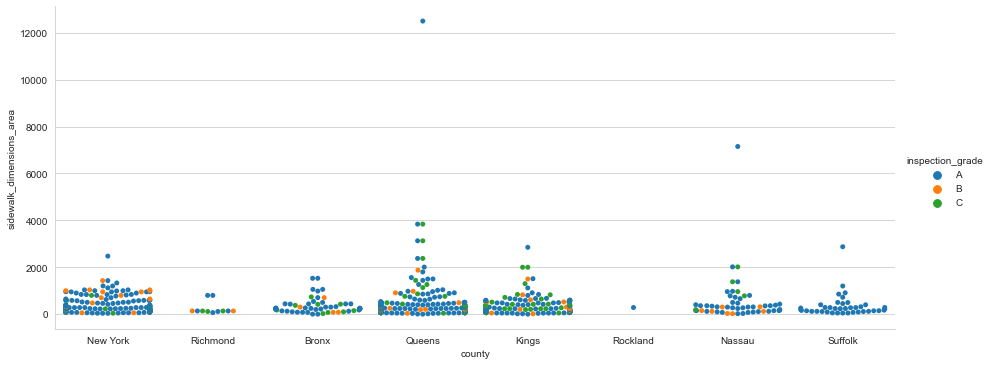

In [48]:
sns.set_style("whitegrid")
sns.catplot(x="county", y="sidewalk_dimensions_area", hue="inspection_grade", kind="swarm",height=5,aspect=2.5, data=final_data_1_2)
sns.set_context("poster")

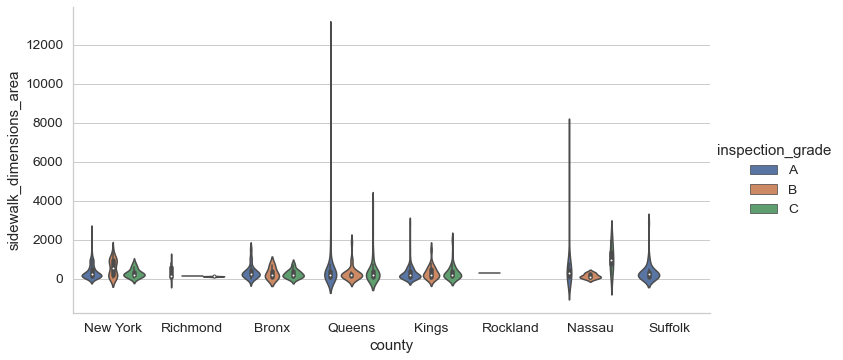

In [49]:
#fig_dims = (12, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
sns.catplot(x="county", y="sidewalk_dimensions_area", hue="inspection_grade", 
            kind="violin",aspect=2,height=5, data=final_data_1_2)
# Largest Context:
#sns.set_context("poster")


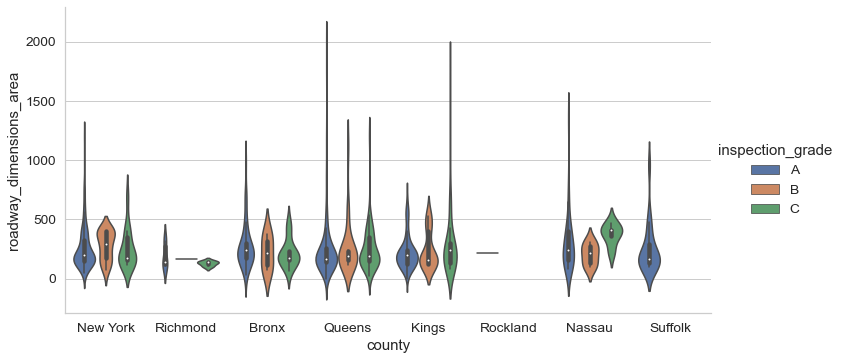

In [50]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
sns.catplot(x="county", y="roadway_dimensions_area", hue="inspection_grade", 
            kind="violin",aspect=2,height=5, data=final_data_1_2)

<AxesSubplot:xlabel='county', ylabel='sidewalk_dimensions_area'>

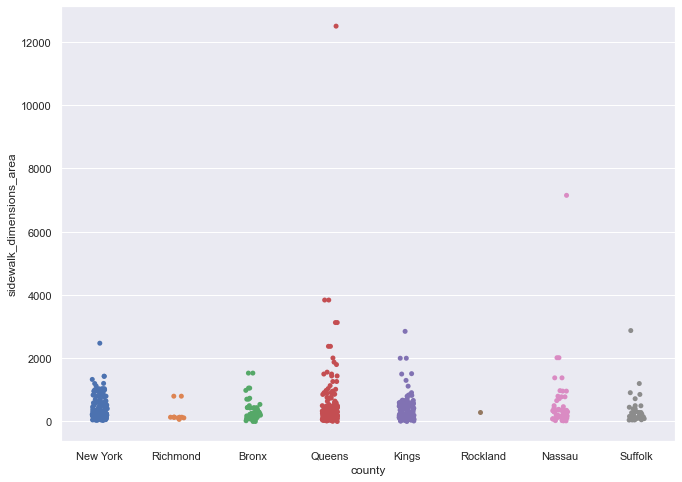

In [51]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.stripplot(x="county", y="sidewalk_dimensions_area", data=final_data_1_2)

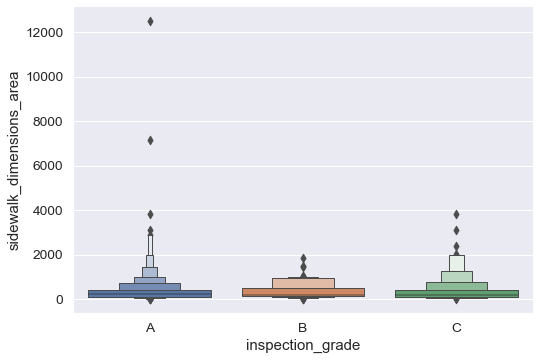

In [52]:
sns.set(font_scale=1.25)
sns.catplot( x="inspection_grade", y="sidewalk_dimensions_area", height=5,aspect=1.5,
            kind="boxen", data=final_data_1_2)

<AxesSubplot:xlabel='inspection_grade', ylabel='sidewalk_dimensions_area'>

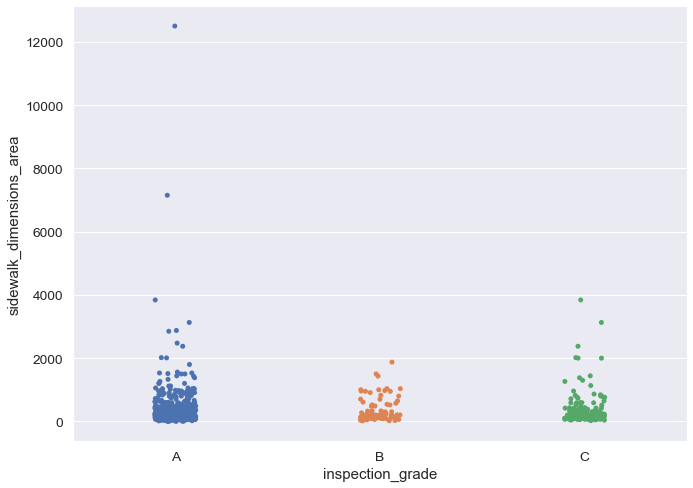

In [53]:
sns.set_style("darkgrid")
sns.stripplot(x="inspection_grade", y="sidewalk_dimensions_area", data=final_data_1_2)

<AxesSubplot:xlabel='inspection_grade', ylabel='count'>

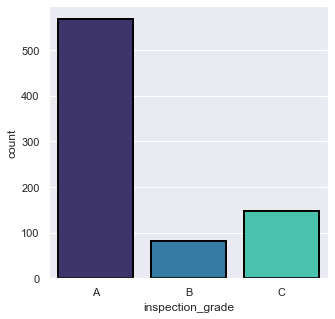

In [60]:
sns.set(font_scale=1.25)
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='inspection_grade',palette="mako",saturation=1, edgecolor=(0,0,0),
                  linewidth=2, data = final_data_1_2)

In [55]:
# count plot on two categorical variable
#sns.countplot(y ='county', hue = "inspection_grade", data = final_data_1_2)

<AxesSubplot:xlabel='county', ylabel='count'>

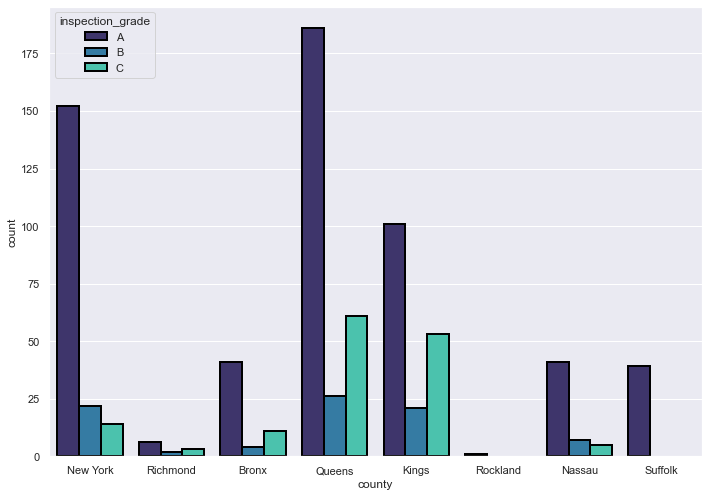

In [56]:
# count plot on two categorical variable
sns.set(font_scale=1)
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='county', hue = "inspection_grade",palette="mako",saturation=1, edgecolor=(0,0,0),
                  linewidth=2, data = final_data_1_2)

<AxesSubplot:xlabel='inspection_grade', ylabel='count'>

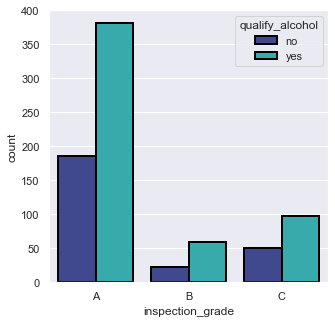

In [57]:
sns.set(font_scale=1.25)
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='inspection_grade', hue = "qualify_alcohol", palette="mako",saturation=1, edgecolor=(0,0,0),
                  linewidth=2, data = final_data_1_2)
#darkgrid


<AxesSubplot:xlabel='inspection_grade', ylabel='count'>

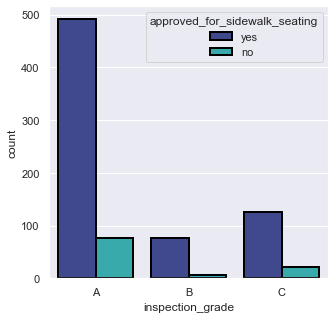

In [64]:
sns.set(font_scale=1.25)
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='inspection_grade', hue = "approved_for_sidewalk_seating", palette="mako",saturation=1, edgecolor=(0,0,0),
                  linewidth=2, data = final_data_1_2)
#darkgrid
#sns.pointplot(final_data_1_2['humidity'], final_data_1_2['temperature'], hue=final_data_1_2['weather_type'])

<AxesSubplot:xlabel='inspection_grade', ylabel='count'>

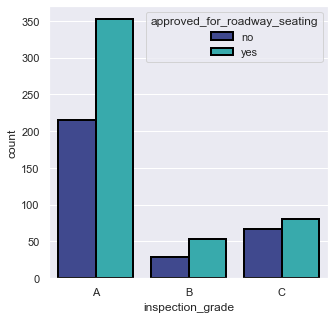

In [67]:
sns.set(font_scale=1.25)
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='inspection_grade', hue = "approved_for_roadway_seating", palette="mako",saturation=1, edgecolor=(0,0,0),
                  linewidth=2, data = final_data_1_2)


<AxesSubplot:xlabel='sla_license_type', ylabel='count'>

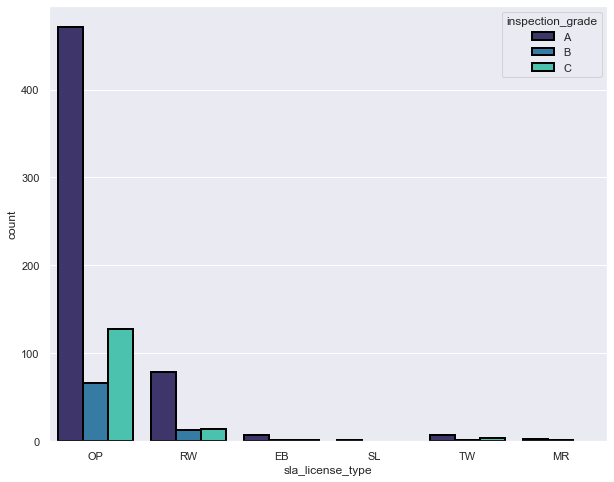

In [66]:
sns.set(font_scale=1.25)
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x ='sla_license_type', hue = "inspection_grade", palette="mako",saturation=1, edgecolor=(0,0,0),
                  linewidth=2, data = final_data_1_2)
#darkgrid
#darkgrid

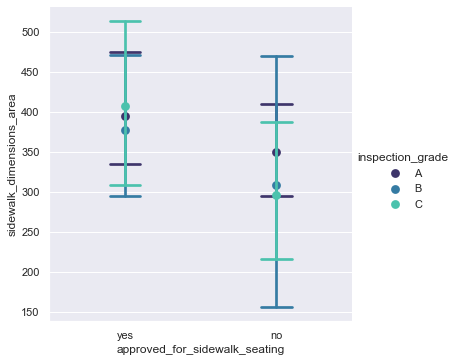

In [68]:
sns.catplot(data= final_data_1_2,x='approved_for_sidewalk_seating',y='sidewalk_dimensions_area', palette="mako",kind='point',hue="inspection_grade", join=False,capsize=0.2)

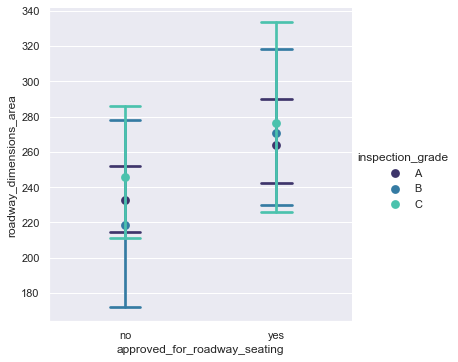

In [69]:
sns.catplot(data= final_data_1_2,x='approved_for_roadway_seating',y='roadway_dimensions_area',palette="mako",kind='point',hue="inspection_grade", join=False,capsize=0.2)